In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import Quantities, Cross_Quantities, Abs_Bars3D, Cross_Probability, cross_qndness, cross_fidelity
import matplotlib
import seaborn as sns
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
Datos = []

for k in range(1000):
    loaded = np.load( 'montecarlo_with_GST/datos_mc_{}.npy'.format(k), allow_pickle=True )
    Datos.append( loaded )
    # quantities, quantities_2, cross_quantities, single, double, gst

In [3]:
POVM_single = [  [ d[3][j][0] for j in range(7)  ] for d in Datos]
Choi_single = [  [ d[3][j][1] for j in range(7)  ] for d in Datos]

POVM_double = np.array([  [ [ d[4][j][k][0] for k in range(2) ] for j in range(3) ] for d in Datos])
Choi_double = np.array([  [ [ d[4][j][k][1] for k in range(2) ] for j in range(3)  ] for d in Datos])

qubits = [ [(1,3),(4,5)],[(3,5),(0,1)],[(1,2),(5,6)] ]

In [4]:
quantities = [ [ Quantities( POVM_single[k][j], Choi_single[k][j] ) for j in range(7) ] for k in range(1000) ]
quantities_2 = [ [ [ Quantities( POVM_double[k][j][i], Choi_double[k][j][i] ) for i in range(2) ] for j in range(3) ] for k in range(1000) ] 
cross_quantities = [ [ [ Cross_Quantities( POVM_single[k][qubits[j][i][0]], Choi_single[k][qubits[j][i][0]], 
                                          POVM_single[k][qubits[j][i][1]], Choi_single[k][qubits[j][i][1]] , 
                                          POVM_double[k][j][i], Choi_double[k][j][i] ) 
                        for i in range(2) ] for j in range(3) ] for k in range(1000) ] 

In [5]:
quantities_mean = np.mean( quantities, axis=0 )
quantities_std  = np.std( quantities, axis=0 )

In [6]:
color = ['tab:green','tab:orange','tab:blue']

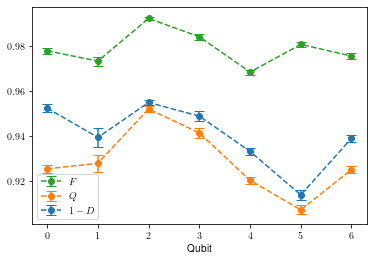

In [7]:
for k in range(3):
    plt.errorbar( x=range(7), y=quantities_mean[:,k], yerr=quantities_std[:,k], capsize=5, fmt='--o',color=color[k] )
plt.xlabel('Qubit')
plt.legend( [r'$F$',r'$Q$', r'$1-D$'], loc='lower left' )
plt.savefig('quantities_single.svg', bbox_inches='tight' )

In [8]:
quantities_mean

array([[0.97777915, 0.9254095 , 0.95234086],
       [0.97320509, 0.92788192, 0.93934933],
       [0.99212346, 0.95195209, 0.9548491 ],
       [0.98399465, 0.94133458, 0.94878967],
       [0.96833541, 0.92030403, 0.93314378],
       [0.98061046, 0.90721036, 0.91385338],
       [0.97544786, 0.92509986, 0.93893553]])

In [9]:
quantities_2_mean = np.mean( quantities_2, axis=0 ).reshape(6,-1)
quantities_2_std  = np.std( quantities_2, axis=0 ).reshape(6,-1)

In [10]:
quantities_2_mean

array([[0.95672617, 0.87236199, 0.90326935],
       [0.94816537, 0.83507535, 0.87372423],
       [0.96239922, 0.84809778, 0.87525604],
       [0.95131033, 0.86323368, 0.90703461],
       [0.96394223, 0.87360194, 0.90244821],
       [0.95319179, 0.83510571, 0.87434766]])

In [11]:
order_pairs = [ 3, 4, 0, 2, 1, 5 ]

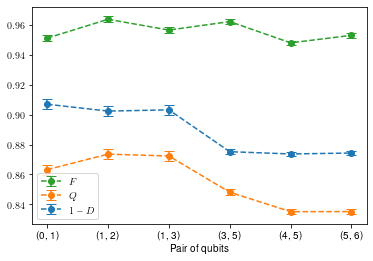

In [12]:
for k in range(3):
    plt.errorbar( x=range(6), y=quantities_2_mean[order_pairs,k], yerr=quantities_2_std[order_pairs,k], capsize=5, fmt='--o', color=color[k] )
plt.xlabel( 'Pair of qubits')
plt.legend( [r'$F$',r'$Q$', r'$1-D$'], loc='lower left'  )
plt.xticks( [0,1,2,3,4,5], [(0,1),(1,2),(1,3),(3,5),(4,5),(5,6)] )
plt.savefig('quantities_double.svg', bbox_inches='tight')

In [13]:
np.max(quantities_mean), np.max(quantities_2_mean)

(0.9921234608738119, 0.9639422270390584)

In [14]:
np.min(quantities_mean), np.min(quantities_2_mean)

(0.9072103573075412, 0.8350753455592335)

In [15]:
color_map = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
colors = matplotlib.colors.Normalize( vmin=90, vmax=96)
l_colors = [255*np.array(color_map(colors(100*err))) for err in quantities_mean[:,1] ]
255*np.array(color_map(colors(0))), 255*np.array(color_map(colors(100))), l_colors

(array([ 28.80987579,  38.16447768,  62.18182783, 255.        ]),
 array([217.75517571, 211.88998467, 242.34884824, 255.        ]),
 [array([104.10570744, 109.84451709, 163.27312336, 255.        ]),
  array([111.78664261, 116.39745337, 170.81392438, 255.        ]),
  array([192.11043187, 186.5590866 , 229.97301796, 255.        ]),
  array([157.65813872, 155.5164045 , 208.61731666, 255.        ]),
  array([ 86.87627274,  94.91781051, 144.86934559, 255.        ]),
  array([ 47.66957415,  58.33685436,  93.45812351, 255.        ]),
  array([103.01472544, 108.9099469 , 162.17031288, 255.        ])])

In [16]:
color_map = sns.cubehelix_palette(rot=-.4, reverse=True, as_cmap=True)
colors = matplotlib.colors.Normalize( vmin=83, vmax=88)
l_colors = [255*np.array(color_map(colors(100*err))) for err in quantities_2_mean[order_pairs,1] ]
255*np.array(color_map(colors(0))), 255*np.array(color_map(colors(100))), l_colors

(array([ 27.77491317,  38.77109381,  61.7507723 , 255.        ]),
 array([198.59433255, 228.9180809 , 203.27276485, 255.        ]),
 [array([113.9008589 , 178.7069513 , 158.11450764, 255.        ]),
  array([165.21526814, 212.46666864, 182.54586701, 255.        ]),
  array([157.88041025, 208.45029738, 178.6378181 , 255.        ]),
  array([ 63.87908429, 118.12697398, 128.55758792, 255.        ]),
  array([ 36.93294763,  58.74957197,  84.16243266, 255.        ]),
  array([ 37.44741646,  59.95823855,  85.36739342, 255.        ])])

In [17]:
np.mean( quantities_2_mean[[2,1,5],:], axis=0 )

array([0.95458546, 0.83942628, 0.87444264])

In [18]:
def Cross_Probability( f1, f2, pairs ):
    
    f = []
    for j in range(len(f2)):
        p = pairs[j]
        f.append( abs( f1[p[0]] * f1[p[1]] - f2[j]  ) )
    return f

In [19]:
cfidelity = np.array([ Cross_Probability( np.array(quantities)[j,:,0], np.array(quantities_2).reshape(1000,6,3)[j,:,0],
                                              [ (1,3),(4,5),(3,5),(0,1),(1,2),(5,6) ] ) for j in range(1000) ])
cqndness  = np.array([ Cross_Probability( np.array(quantities)[j,:,1], np.array(quantities_2).reshape(1000,6,3)[j,:,1],
                                              [ (1,3),(4,5),(3,5),(0,1),(1,2),(5,6) ] ) for j in range(1000) ])

In [20]:
#cqndness = np.array( [ [ [ cross_qndness( Choi_single[k][qubits[j][i][0]], Choi_single[k][qubits[j][i][1]], Choi_double[k][j][i]  ) 
#                        for i in range(2) ] for j in range(3) ] for k in range(1000) ] ).reshape(1000, 6 )
#
#cfidelity = np.array( [ [ [ cross_fidelity( POVM_single[k][qubits[j][i][0]],
#                                          POVM_single[k][qubits[j][i][1]],  
#                                          POVM_double[k][j][i] ) 
#                        for i in range(2) ] for j in range(3) ] for k in range(1000) ] ).reshape(1000, 6 )

In [21]:
cross_fidelity_mean = np.mean( cfidelity, axis=0 )
cross_qndness_mean = np.mean( cqndness, axis=0 )
cross_fidelity_std = np.std( cfidelity, axis=0 )
cross_qndness_std = np.std( cqndness, axis=0 )

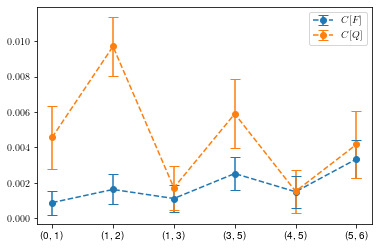

In [22]:
plt.errorbar( x=range(6), y=cross_fidelity_mean[order_pairs], yerr=cross_fidelity_std[order_pairs], capsize=5, fmt='--o' )
plt.errorbar( x=range(6), y=cross_qndness_mean[order_pairs], yerr=cross_qndness_std[order_pairs], capsize=5, fmt='--o' )
plt.legend( [r'$C[F]$', r'$C[Q]$'] )
plt.xticks( [0,1,2,3,4,5], [(0,1),(1,2),(1,3),(3,5),(4,5),(5,6)] )
plt.savefig('cross_fidelity.pdf', bbox_inches='tight' )

In [23]:
cros_quantities_mean = np.mean( cross_quantities, axis=0 ).reshape(6,-1)
cros_quantities_std  = np.std( cross_quantities, axis=0 ).reshape(6,-1)

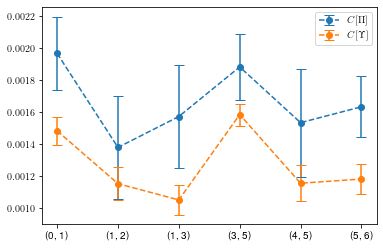

In [39]:
for k in range(2,4):
    plt.errorbar( x=range(6), y=cros_quantities_mean[order_pairs,k], yerr=cros_quantities_std[order_pairs,k], capsize=5, fmt='--o' )
plt.legend( [r'$C[\Pi]$', r'$C[\Upsilon]$'] )
plt.xticks( [0,1,2,3,4,5], [(0,1),(1,2),(1,3),(3,5),(4,5),(5,6)] )
plt.savefig('cross_error.pdf', bbox_inches='tight' )

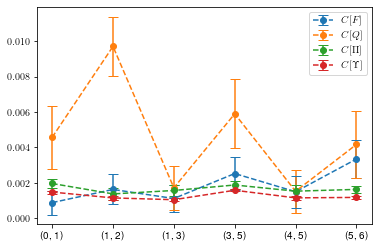

In [45]:
plt.errorbar( x=range(6), y=cross_fidelity_mean[order_pairs], yerr=cross_fidelity_std[order_pairs], capsize=5, fmt='--o' )
plt.errorbar( x=range(6), y=cross_qndness_mean[order_pairs], yerr=cross_qndness_std[order_pairs], capsize=5, fmt='--o' )
for k in range(2,4):
    plt.errorbar( x=range(6), y=cros_quantities_mean[order_pairs,k], yerr=cros_quantities_std[order_pairs,k], capsize=5, fmt='--o' )
plt.legend( [r'$C[F]$', r'$C[Q]$', r'$C[\Pi]$', r'$C[\Upsilon]$'] )
plt.xticks( [0,1,2,3,4,5], [(0,1),(1,2),(1,3),(3,5),(4,5),(5,6)] )
plt.savefig('cross_both.pdf', bbox_inches='tight' )

In [25]:
#for k in range(2):
#    plt.errorbar( x=range(6), y=cros_quantities_mean[:,k], yerr=cros_quantities_std[:,k], capsize=5, fmt='--o' )
#plt.legend( ['cFid_POVM','cFid_Choi'] )
#plt.xticks( [0,1,2,3,4,5], [(1,3),(4,5),(3,5),(0,1),(1,2),(5,6)] );
#plt.savefig('cross_matrix_fidelity.pdf', bbox_inches='tight' )

In [26]:
def BarPlot( A , yerr=None, colors = ['r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y'], ax=None ):
    A = A.T
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot( 111, projection='3d' )
    
    lenx, leny = A.shape
    z = list(A)
    xs = np.arange(lenx)
    ys = np.arange(leny)
    
    for n in range(leny):
        zs = z[n]
        cs = colors[n]
        ax.bar( xs, A[n], n, zdir='y', color=cs, alpha=0.5)
        
        if yerr is not None:
            for i in xs:
                ax.plot( [i,i], [n, n], [A[n,i]+yerr[n,i], A[n,i]-yerr[n,i]], marker="_", color=cs)
        
    return ax
    
    
def Plot_Chois(  choi, error_choi=None, axes=None, z_lim = 0.1, shape = None, text=True  ) :
    
    N = len( choi )
    if shape is None:
        xx = 1
        yy = N
    else:
        xx = shape[0]
        yy = shape[1]
    
    if axes is None:
        fig = plt.figure(figsize=[yy*5,xx*5])
        axes = []
        for j in range(N):   
            axes.append( fig.add_subplot( xx, yy, j+1, projection='3d') )
            
    for j in range(N):
        ax = axes[j]
        if error_choi is None:
            ax = BarPlot( abs(choi[j]), None, ax=ax )
        else:
            ax = BarPlot( abs(choi[j]), error_choi[j], ax=ax )
        if text is True:
            ax.text( j*N+j, j*N+j, z_lim*1.1, np.round(abs(choi[j])[ j*N+j, j*N+j ],3)  )
        ax.set_zlim([0,z_lim])
    
    return axes
    

In [27]:
Choi_single_mean = np.mean( Choi_single, axis=0 )
Choi_single_std = np.std( Choi_single, axis=0 )

In [28]:
Choi_single_device_mean = np.mean( Choi_single_mean, axis=0 )
Choi_single_device_std  = np.mean( Choi_single_std, axis=0 )

#Choi_single_device_mean = np.mean( Choi_single, axis=(0,1) )
#Choi_single_device_std  = np.std( Choi_single, axis=(0,1) )

In [29]:
abs( Choi_single_device_mean )

array([[[9.76594308e-01, 4.35408527e-03, 4.35408527e-03, 2.79649291e-02],
        [3.04281139e-03, 8.90648076e-04, 1.69353118e-03, 1.14080399e-04],
        [3.04281139e-03, 1.69353118e-03, 8.90648076e-04, 1.14080399e-04],
        [1.21170443e-02, 4.40496568e-04, 4.40496568e-04, 3.21392659e-03]],

       [[3.99312224e-03, 5.99034773e-04, 5.99034773e-04, 8.85035417e-02],
        [1.36867400e-03, 2.13032857e-03, 3.14057007e-03, 6.17703409e-03],
        [1.36867400e-03, 3.14057007e-03, 2.13032857e-03, 6.17703409e-03],
        [7.29533816e-03, 4.60998017e-03, 4.60998017e-03, 8.80317790e-01]]])

In [30]:
Choi_single_device_std

array([[[0.00143924, 0.00550581, 0.00550581, 0.00241578],
        [0.00735319, 0.00590508, 0.00579309, 0.00188349],
        [0.00735319, 0.00579309, 0.00590508, 0.00188349],
        [0.00104141, 0.00102463, 0.00102463, 0.00065999]],

       [[0.00071522, 0.00267555, 0.00267555, 0.00469395],
        [0.00142545, 0.00493862, 0.0084813 , 0.00829174],
        [0.00142545, 0.0084813 , 0.00493862, 0.00829174],
        [0.0009636 , 0.00567364, 0.00567364, 0.00392277]]])

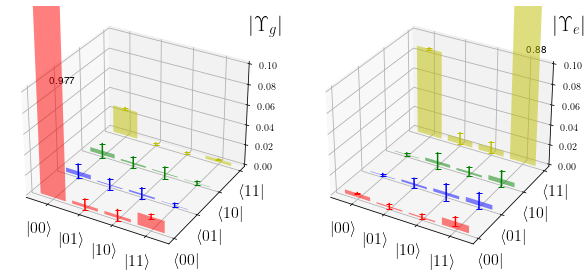

In [31]:
Labels = [ r'$|\Upsilon_g|$', r'$|\Upsilon_e|$'  ]
j = 0
axes = Plot_Chois(Choi_single_device_mean, Choi_single_device_std )
for ax in axes:
    ax.set_xticks( [0,1,2,3] )
    ax.set_xticklabels( [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$'], size=16 )
    ax.set_yticks( [0,1,2,3] )
    ax.set_yticklabels( [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$'], size=16 )
    ax.text( 3.2, 4, 0.1*1.15, Labels[j], size = 21 )
    j += 1
plt.savefig('choi_single.svg', bbox_inches='tight' )

In [32]:
Choi_single_mean[5]

array([[[ 9.88663517e-01+0.j        ,  1.70276258e-03+0.00531857j,  1.70276258e-03-0.00531857j,  3.14259535e-02+0.j        ],
        [-1.43153732e-03+0.00075486j, -2.93698936e-03+0.00146232j,  1.63902508e-03-0.00575808j, -2.40290080e-04-0.00066901j],
        [-1.43153732e-03-0.00075486j,  1.63902508e-03+0.00575808j, -2.93698936e-03-0.00146232j, -2.40290080e-04+0.00066901j],
        [ 6.52713852e-03+0.j        ,  7.14046448e-05+0.00032632j,  7.14046448e-05-0.00032632j,  2.57516728e-03+0.j        ]],

       [[ 1.06151824e-03+0.j        ,  1.53143326e-04-0.00055051j,  1.53143326e-04+0.00055051j,  1.40245702e-01+0.j        ],
        [-7.82748657e-04+0.00072187j, -1.39563888e-03-0.00179766j, -2.49307288e-03-0.0044312j ,  6.00463419e-04-0.0065033j ],
        [-7.82748657e-04-0.00072187j, -2.49307288e-03+0.0044312j , -1.39563888e-03+0.00179766j,  6.00463419e-04+0.0065033j ],
        [ 3.74380573e-03+0.j        , -1.92545956e-03-0.00509253j, -1.92545956e-03+0.00509253j,  8.25757197e-01+0.j 

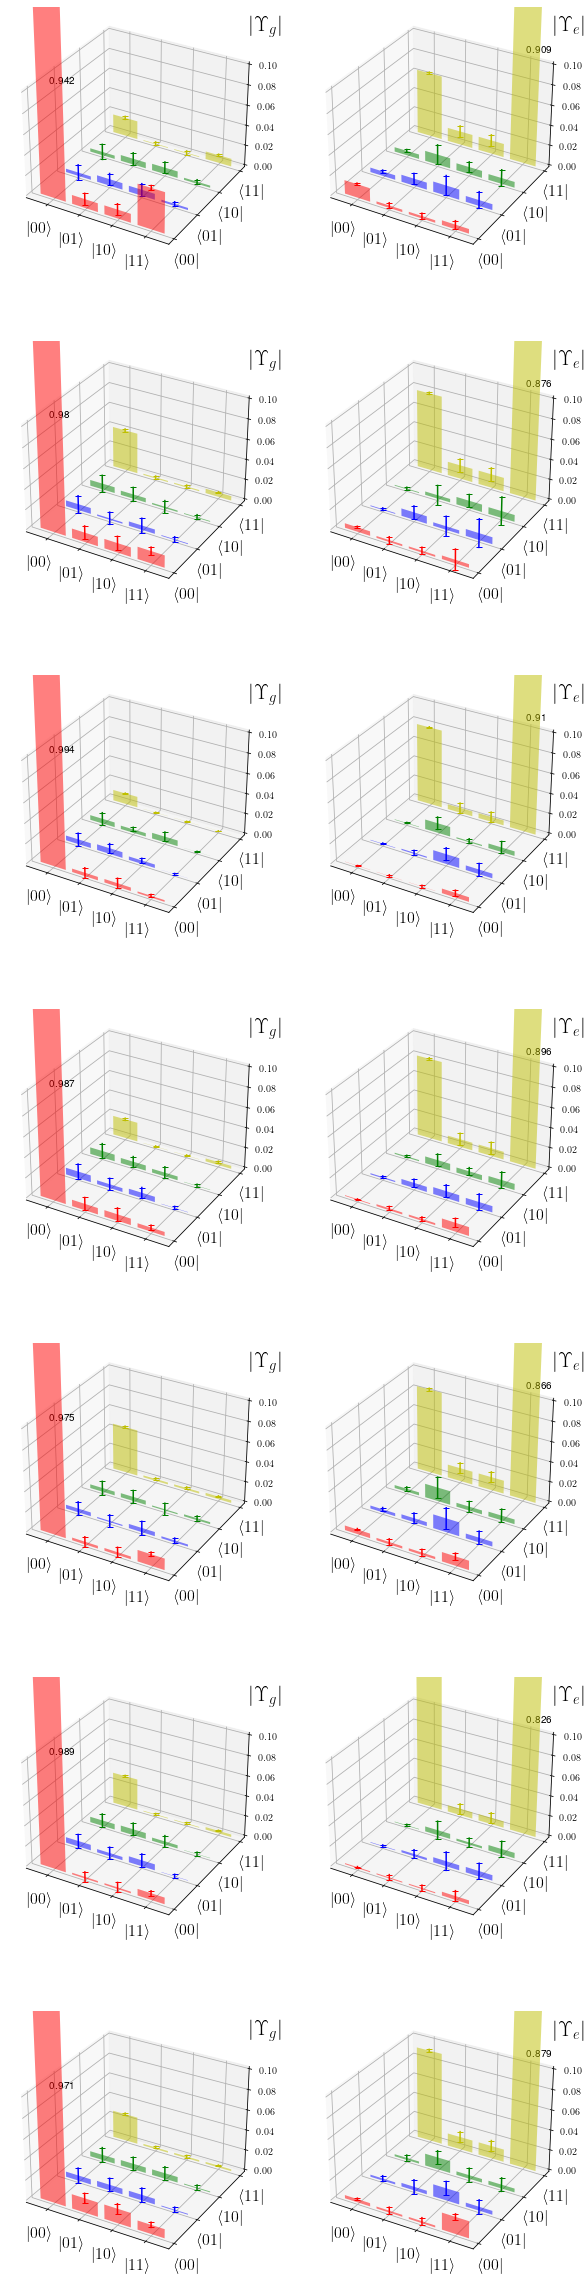

In [33]:
fig = plt.figure(figsize=[10, 6*7])
for idx in range(7):
    ax1 = fig.add_subplot(7,2,2*idx+1, projection='3d')
    ax2 = fig.add_subplot(7,2,2*idx+2, projection='3d')
    Plot_Chois( Choi_single_mean[idx], Choi_single_std[idx], axes=(ax1,ax2) )
    ax1.text( 3.2, 4, 0.1*1.15, Labels[0], size = 21 )
    ax2.text( 3.2, 4, 0.1*1.15, Labels[1], size = 21 )
    ax1.set_xticks( [0,1,2,3] )
    ax1.set_xticklabels( [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$'], size=16 )
    ax1.set_yticks( [0,1,2,3] )
    ax1.set_yticklabels( [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$'], size=16 )
    ax2.set_xticks( [0,1,2,3] )
    ax2.set_xticklabels( [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$'], size=16 )
    ax2.set_yticks( [0,1,2,3] )
    ax2.set_yticklabels( [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$'], size=16 )



In [34]:
Choi_double_mean = np.mean( Choi_double, axis=0 )
Choi_double_std = np.std( Choi_double, axis=0 )

In [35]:
Choi_double_device_mean = np.mean( Choi_double_mean, axis=(0,1) )
Choi_double_device_std  = np.mean( Choi_double_std, axis=(0,1) )

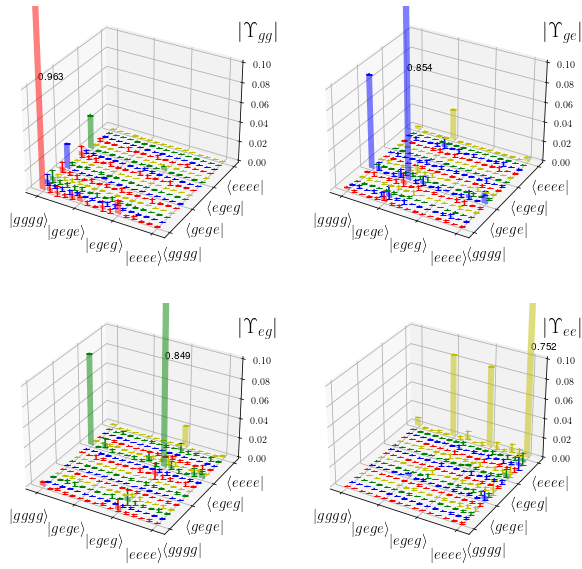

In [36]:
Labels = [ r'$|\Upsilon_{gg}|$', r'$|\Upsilon_{ge}|$', r'$|\Upsilon_{eg}|$', r'$|\Upsilon_{ee}|$' ]
j = 0
axes = Plot_Chois(Choi_double_device_mean, Choi_double_device_std, shape=(2,2))
for ax in axes:
    ax.set_xticks( [0,5,10,15] )
    ax.set_xticklabels( [r'$|gggg\rangle$', r'$|gege\rangle$', r'$|egeg\rangle$',r'$|eeee\rangle$'], size=15 )
    ax.set_yticks( [0,5,10,15] )
    ax.set_yticklabels( [r'$\langle gggg|$', r'$\langle gege|$', r'$\langle egeg|$', r'$\langle eeee|$'], size=15 )
    ax.text( 16., 16, 0.1*1.25, Labels[j], size = 21 )
    j += 1
plt.savefig('chois_double.svg', bbox_inches='tight' )

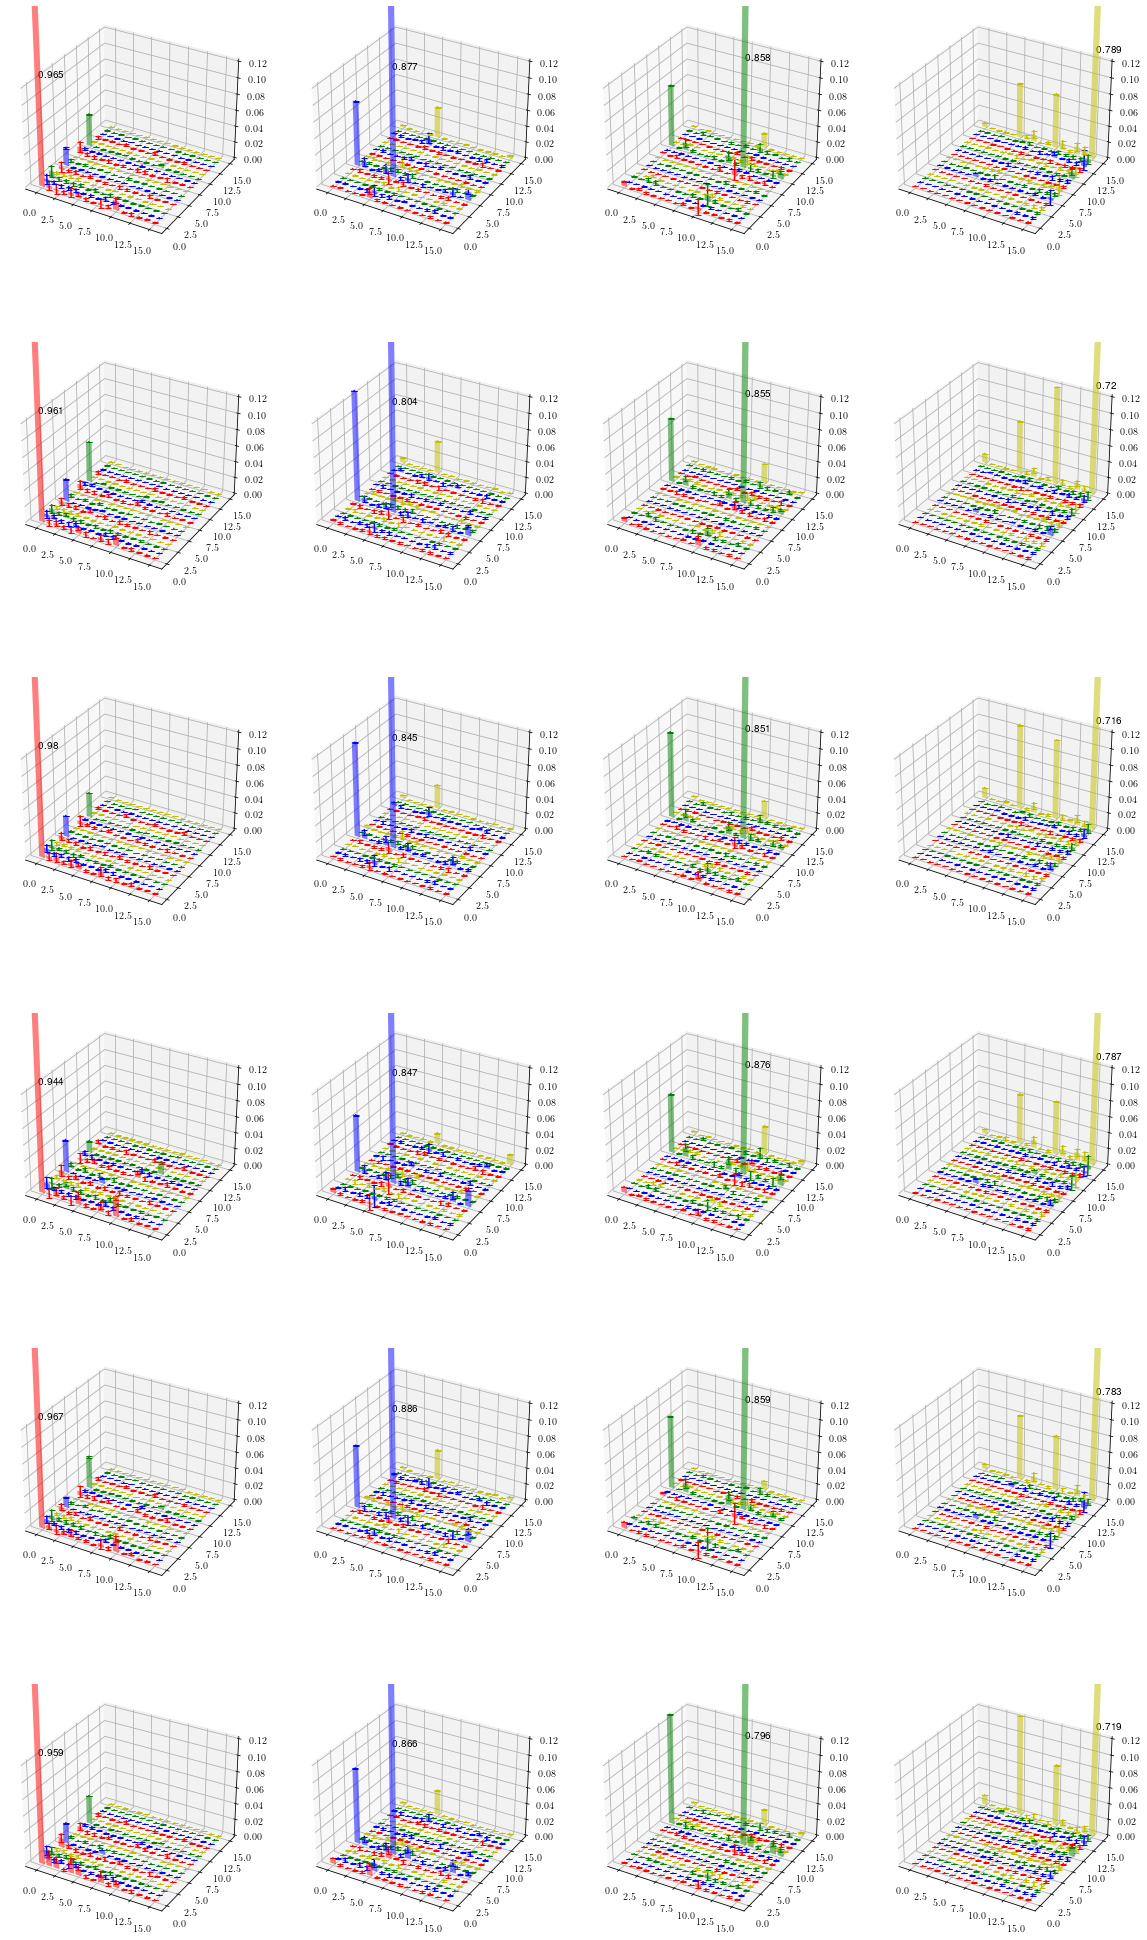

In [37]:
fig = plt.figure(figsize=[20, 6*6])
idx = 0
for idx1 in range(3):
    for idx2 in range(2):
        ax1 = fig.add_subplot( 6, 4, 4*idx+1, projection='3d')
        ax2 = fig.add_subplot( 6, 4, 4*idx+2, projection='3d')
        ax3 = fig.add_subplot( 6, 4, 4*idx+3, projection='3d')
        ax4 = fig.add_subplot( 6, 4, 4*idx+4, projection='3d')
        idx += 1
        Plot_Chois(Choi_double_mean[idx1][idx2], Choi_double_std[idx1][idx2], axes=(ax1,ax2,ax3,ax4), z_lim=0.12)

In [52]:
data1 = { 'quantities_mean' : quantities_mean,
            'quantities_std' : quantities_std,
            'chois_mean' : Choi_single_mean,
            'chois_std' : Choi_single_std,
            'Choi_device_mean' : Choi_single_device_mean,
            'Choi_device_std' : Choi_single_device_std   }
data2 = { 'quantities_mean' : quantities_2_mean,
            'quantities_std' : quantities_2_std,
            'chois_mean' : Choi_double_mean,
            'chois_std' : Choi_double_std,
            'Choi_device_mean' : Choi_double_device_mean,
            'Choi_device_std' : Choi_double_device_std }
data3 = { 'cross_fidelity_mean': cross_fidelity_mean,
            'cross_fidelity_std': cross_fidelity_std,
            'cross_qndness_mean': cross_qndness_mean,
            'cross_qndness_std' : cross_qndness_std,
            'cross_pvm_mean' : cros_quantities_mean[:,2],
            'cross_choi_mean' : cros_quantities_mean[:,3],
            'cross_pvm_std' : cros_quantities_std[:,2],
            'cross_choi_std' : cros_quantities_std[:,3],
              }
data = { 'single' : data1,
          'double' : data2,
          'crosstalk': data3  }

np.save( 'data_final_tomography', np.array([data],dtype=object) )